# Processing Ordering & Smoothing

# Σε αυτό το Notebook θα ενώσουμε τα δεδομένα που πήραμε απο διαφορετικές πηγές ώστε να φτιάξουμε έναν ολοκληρωμένο πίνακα με τα δεδομένα που μας ενδιαφέρουν
# Επίσης θα κάνουμε μια επεξεργασία στα δεδομένα μας για να τα φέρουμε στην μορφή που τα θέλουμε


## Στο πρώτο βήμα θα εγκαταστήσουμε τις βιβλιοθήκες που θα χρειαστούμε για το processing των δεδομένων

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Εδώ καλούμε το πρώτο αρχείο οπου έχει  τα δεδομένα του RGDP

In [84]:
dfRGDP = pd.read_csv(r"C:\Users\chilly\Desktop\micronomic datas\unprocessed data\Real GDP.csv")
print(dfRGDP.head(-1))
print(dfRGDP.info())

    observation_date      GDPC1
0         1947-01-01   2182.681
1         1947-04-01   2176.892
2         1947-07-01   2172.432
3         1947-10-01   2206.452
4         1948-01-01   2239.682
..               ...        ...
306       2023-07-01  22780.933
307       2023-10-01  22960.600
308       2024-01-01  23053.545
309       2024-04-01  23223.906
310       2024-07-01  23400.294

[311 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  312 non-null    object 
 1   GDPC1             312 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB
None


## Κάνουμε κάποιες αλλαγές ,φτιαχνουμε τα δεδομένα να είναι ανα μήνα και κανουμε ενα Interpolation

In [85]:
# Βήμα 1 : Μετατρέπουμε την στήλη των ημερομηνιών σε Datetime 
dfRGDP["observation_date"] = pd.to_datetime(dfRGDP["observation_date"])
dfRGDP.info()


# Βήμα 2: Θέτουμε 'observation_date' ως index.
dfRGDP.set_index('observation_date', inplace=True)

print("Original Quarterly Data:")
print(dfRGDP.head())
print(dfRGDP.count())

# Βήμα 3 : φτιαχνουμε τα δεδομένα μας σε μηνιαία συχνότητα
# Αυτό θα δημιουργήσει κενά για τους μήνες που δεν υπάρχουν 
dfRGDP_monthly = dfRGDP.resample('MS').mean()

print("\nResampled Monthly Data (with NaNs):")
print(dfRGDP_monthly.head())

#Interpolation
#Για κάθε αλληλουχία από ελλείπουσες τιμές, υπολογίζει μια ευθεία ανάμεσα στο πλησιέστερο προηγούμενο και το πλησιέστερο επόμενο διαθέσιμο σημείο.
#(Γραμμική παρεμβολή)
dfRGDP_interpolated = dfRGDP_monthly.interpolate(method='linear')
print("\nInterpolated Monthly Data:")
print(dfRGDP_interpolated.head())
print(dfRGDP_interpolated.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  312 non-null    datetime64[ns]
 1   GDPC1             312 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB
Original Quarterly Data:
                     GDPC1
observation_date          
1947-01-01        2182.681
1947-04-01        2176.892
1947-07-01        2172.432
1947-10-01        2206.452
1948-01-01        2239.682
GDPC1    312
dtype: int64

Resampled Monthly Data (with NaNs):
                     GDPC1
observation_date          
1947-01-01        2182.681
1947-02-01             NaN
1947-03-01             NaN
1947-04-01        2176.892
1947-05-01             NaN

Interpolated Monthly Data:
                        GDPC1
observation_date             
1947-01-01        2182.681000
1947-02-01        2180.751333
1947-03

In [86]:
#μετανομασία της στήλης
dfRGDP_interpolated.rename(columns={'GDPC1': 'RGDP'}, inplace=True)

In [87]:
print(dfRGDP_interpolated.head())
print(dfRGDP_interpolated.info())


                         RGDP
observation_date             
1947-01-01        2182.681000
1947-02-01        2180.751333
1947-03-01        2178.821667
1947-04-01        2176.892000
1947-05-01        2175.405333
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 934 entries, 1947-01-01 to 2024-10-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RGDP    934 non-null    float64
dtypes: float64(1)
memory usage: 14.6 KB
None


In [88]:
dfRGDP_interpolated

,RGDP
observation_date,
1947-01-01,2182.681000
1947-02-01,2180.751333
1947-03-01,2178.821667
1947-04-01,2176.892000
1947-05-01,2175.405333
...,...
2024-06-01,23341.498000
2024-07-01,23400.294000
2024-08-01,23447.645667


## Εδώ καλούμε το δεύτερο αρχείο οπου έχει  τα δεδομένα του GDP

In [89]:
dfGDP = pd.read_csv(r"C:\Users\chilly\Desktop\micronomic datas\unprocessed data\GDP.csv")
print(dfGDP.head())

  observation_date      GDP
0       1947-01-01  243.164
1       1947-04-01  245.968
2       1947-07-01  249.585
3       1947-10-01  259.745
4       1948-01-01  265.742


In [90]:
# Βήμα 1 :  Μετατρέπουμε την στήλη των ημερομηνιών σε Datetime 
dfGDP["observation_date"] = pd.to_datetime(dfGDP["observation_date"])
dfGDP.info()


# Βήμα 2: Θέτουμε 'observation_date' ως index.
dfGDP.set_index('observation_date', inplace=True)

print("Original Quarterly Data:")
print(dfGDP.head())
print(dfGDP.count())

# Βήμα 3 : φτιαχνουμε τα δεδομένα μας σε μηνιαία συχνότητα
# Αυτό θα δημιουργήσει κενά για τους μήνες που δεν υπάρχουν 
dfGDP_monthly = dfGDP.resample('MS').mean()

print("\nResampled Monthly Data (with NaNs):")
print(dfGDP_monthly.head())

#Interpolation
#Για κάθε αλληλουχία από ελλείπουσες τιμές, υπολογίζει μια ευθεία ανάμεσα στο πλησιέστερο προηγούμενο και το πλησιέστερο επόμενο διαθέσιμο σημείο.
#(Γραμμική παρεμβολή)
dfGDP_interpolated = dfGDP_monthly.interpolate(method='linear')
print("\nInterpolated Monthly Data:")
print(dfGDP_interpolated.head())
print(dfGDP_interpolated.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  312 non-null    datetime64[ns]
 1   GDP               312 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB
Original Quarterly Data:
                      GDP
observation_date         
1947-01-01        243.164
1947-04-01        245.968
1947-07-01        249.585
1947-10-01        259.745
1948-01-01        265.742
GDP    312
dtype: int64

Resampled Monthly Data (with NaNs):
                      GDP
observation_date         
1947-01-01        243.164
1947-02-01            NaN
1947-03-01            NaN
1947-04-01        245.968
1947-05-01            NaN

Interpolated Monthly Data:
                         GDP
observation_date            
1947-01-01        243.164000
1947-02-01        244.098667
1947-03-01        245.03333

In [91]:
dfGDP_interpolated

,GDP
observation_date,
1947-01-01,243.164000
1947-02-01,244.098667
1947-03-01,245.033333
1947-04-01,245.968000
1947-05-01,247.173667
...,...
2024-06-01,29255.514000
2024-07-01,29374.914000
2024-08-01,29491.230667


## Εδώ καλούμε το τρίτο αρχείο οπου έχει  τα δεδομένα των Household Savings

In [92]:
#όπως βλέπουμε τα δεδομένα είναι σε μηνιαία βάση αρα δεν χρειάζεται να κανουμε interpolation
dfhs = pd.read_csv(r"C:\Users\chilly\Desktop\micronomic datas\unprocessed data\household saving.csv")
dfhs

,observation_date,W398RC1A027NBEA
0,1992-01-01,428.402
1,1993-01-01,372.934
2,1994-01-01,339.128
3,1995-01-01,358.956
4,1996-01-01,341.666
5,1997-01-01,321.657
6,1998-01-01,391.249
7,1999-01-01,279.283
8,2000-01-01,276.894
9,2001-01-01,357.623


In [93]:
#Θέτουμε ως Index το observation_date
dfhs.set_index('observation_date', inplace=True)

In [94]:
# Επομένως απλώς το μεταονομάζουμε έτσι για λόγους ευκολίας 
dfhs_interpolated=dfhs
# μετανομάζουμε την στήλη που έχει τις τιμές για να είναι πιο ευδιάκριτα τα δεδομένα 
dfhs_interpolated.rename(columns={'W398RC1A027NBEA': 'householdsavings'}, inplace=True)
print(dfhs_interpolated.head())


                  householdsavings
observation_date                  
1992-01-01                 428.402
1993-01-01                 372.934
1994-01-01                 339.128
1995-01-01                 358.956
1996-01-01                 341.666


## Καλούμε το τρίτο αρχείο οπου έχει  τα δεδομένα των Personal Savings 

In [95]:
#όπως βλέπουμε τα δεδομένα είναι σε μηνιαία βάση αρα δεν χρειάζεται να κανουμε interpolation
#μετονομάζουμε και την στήλη με τις τιμές των Personal savings
dfps = pd.read_csv(r"C:\Users\chilly\Desktop\micronomic datas\unprocessed data\Personal Saving.csv")
dfps.rename(columns={'PMSAVE':'personal savings'},inplace=True)
#Θέτουμε ως index το observation_date 
dfps.set_index('observation_date', inplace=True)
# Επομένως απλώς το μεταονομάζουμε έτσι για λόγους ευκολίας 
dfps_interpolated=dfps
print(dfps_interpolated.head())

                  personal savings
observation_date                  
1959-01-01                    39.6
1959-02-01                    37.5
1959-03-01                    36.5
1959-04-01                    40.0
1959-05-01                    38.1


In [168]:
dfps

,index,observation_date,personal savings
0,0,1959-01-01,39.6
1,1,1959-02-01,37.5
2,2,1959-03-01,36.5
3,3,1959-04-01,40.0
4,4,1959-05-01,38.1
...,...,...,...
789,789,2024-10-01,870.6
790,790,2024-11-01,813.8
791,791,2024-12-01,724.1
792,792,2025-01-01,946.5


## Καλούμε το τρίτο αρχείο οπου έχει  τα δεδομένα των Foreign assets in the US 

In [96]:
dffa = pd.read_csv(r"C:\Users\chilly\Desktop\micronomic datas\unprocessed data\Foreign Assets in the U.S. Net, Capital Inflow.csv")
print(dffa.head(-1))


    observation_date     BOPI
0         1960-01-01    0.926
1         1960-04-01    0.912
2         1960-07-01    0.381
3         1960-10-01    0.077
4         1961-01-01    0.435
..               ...      ...
211       2012-10-01  255.714
212       2013-01-01  284.947
213       2013-04-01  203.961
214       2013-07-01  149.918
215       2013-10-01  320.130

[216 rows x 2 columns]


In [97]:
# Μετατρέπουμε την στήλη των ημερομηνιών σε Datetime 
dffa["observation_date"] = pd.to_datetime(dffa["observation_date"])
dffa.info()


# Βήμα 1 : θέτουμε 'observation_date' ως index.
dffa.set_index('observation_date', inplace=True)

print("Original Quarterly Data:")
print(dffa.head())
print(dffa.count())

# Βήμα 3 : φτιαχνουμε τα δεδομένα μας σε μηνιαία συχνότητα
# Αυτό θα δημιουργήσει κενά για τους μήνες που δεν υπάρχουν 
dffa_monthly = dffa.resample('MS').mean()

print("\nResampled Monthly Data (with NaNs):")
print(dffa_monthly.head())

#Interpolation
#Για κάθε αλληλουχία από ελλείπουσες τιμές, υπολογίζει μια ευθεία ανάμεσα στο πλησιέστερο προηγούμενο και το πλησιέστερο επόμενο διαθέσιμο σημείο.
#(Γραμμική παρεμβολή)
dffa_interpolated = dffa_monthly.interpolate(method='linear')
print("\nInterpolated Monthly Data:")
print(dffa_interpolated.head())
print(dffa_interpolated.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  217 non-null    datetime64[ns]
 1   BOPI              217 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB
Original Quarterly Data:
                   BOPI
observation_date       
1960-01-01        0.926
1960-04-01        0.912
1960-07-01        0.381
1960-10-01        0.077
1961-01-01        0.435
BOPI    217
dtype: int64

Resampled Monthly Data (with NaNs):
                   BOPI
observation_date       
1960-01-01        0.926
1960-02-01          NaN
1960-03-01          NaN
1960-04-01        0.912
1960-05-01          NaN

Interpolated Monthly Data:
                      BOPI
observation_date          
1960-01-01        0.926000
1960-02-01        0.921333
1960-03-01        0.916667
1960-04-01        0.912000
1960-05-

In [98]:
#Μετανομάζουμε την στήλη των τιμ΄ών των capital inflow 
dffa_interpolated.rename(columns={'BOPI': 'capital inflow'}, inplace=True)

In [99]:
dffa_interpolated

,capital inflow
observation_date,
1960-01-01,0.926000
1960-02-01,0.921333
1960-03-01,0.916667
1960-04-01,0.912000
1960-05-01,0.735000
...,...
2013-09-01,263.392667
2013-10-01,320.130000
2013-11-01,288.446667


In [100]:
print(dffa_interpolated.head())
print(dfGDP_interpolated.head())
print(dfRGDP_interpolated.head())
print(dfps_interpolated.head())

                  capital inflow
observation_date                
1960-01-01              0.926000
1960-02-01              0.921333
1960-03-01              0.916667
1960-04-01              0.912000
1960-05-01              0.735000
                         GDP
observation_date            
1947-01-01        243.164000
1947-02-01        244.098667
1947-03-01        245.033333
1947-04-01        245.968000
1947-05-01        247.173667
                         RGDP
observation_date             
1947-01-01        2182.681000
1947-02-01        2180.751333
1947-03-01        2178.821667
1947-04-01        2176.892000
1947-05-01        2175.405333
                  personal savings
observation_date                  
1959-01-01                    39.6
1959-02-01                    37.5
1959-03-01                    36.5
1959-04-01                    40.0
1959-05-01                    38.1


In [104]:
dffa_interpolated.reset_index(inplace=True)
dfGDP_interpolated.reset_index(inplace=True)
dfRGDP_interpolated.reset_index(inplace=True)
dfps_interpolated.reset_index(inplace=True)

In [105]:
print(dffa_interpolated.head())
print(dfGDP_interpolated.head())
print(dfRGDP_interpolated.head())
print(dfps_interpolated.head())

   index observation_date  capital inflow
0      0       1960-01-01        0.926000
1      1       1960-02-01        0.921333
2      2       1960-03-01        0.916667
3      3       1960-04-01        0.912000
4      4       1960-05-01        0.735000
   index observation_date         GDP
0      0       1947-01-01  243.164000
1      1       1947-02-01  244.098667
2      2       1947-03-01  245.033333
3      3       1947-04-01  245.968000
4      4       1947-05-01  247.173667
   index observation_date         RGDP
0      0       1947-01-01  2182.681000
1      1       1947-02-01  2180.751333
2      2       1947-03-01  2178.821667
3      3       1947-04-01  2176.892000
4      4       1947-05-01  2175.405333
   index observation_date  personal savings
0      0       1959-01-01              39.6
1      1       1959-02-01              37.5
2      2       1959-03-01              36.5
3      3       1959-04-01              40.0
4      4       1959-05-01              38.1


# Αρχίζουμε να κάνουμε Merge τα Dataframe που έχουμε δημιουργήσει

In [108]:
#ενώνουμε τα personal saving με foreign assets πάνω στην στήλη index που φτιάξαμε
merged_dffa_dfps_ = pd.merge(dffa_interpolated, dfps_interpolated, how='right', on='index')


In [109]:
merged_dffa_dfps_

,index,observation_date_x,capital inflow,observation_date_y,personal savings
0,0,1960-01-01,0.926000,1959-01-01,39.6
1,1,1960-02-01,0.921333,1959-02-01,37.5
2,2,1960-03-01,0.916667,1959-03-01,36.5
3,3,1960-04-01,0.912000,1959-04-01,40.0
4,4,1960-05-01,0.735000,1959-05-01,38.1
...,...,...,...,...,...
789,789,NaT,NaN,2024-10-01,870.6
790,790,NaT,NaN,2024-11-01,813.8
791,791,NaT,NaN,2024-12-01,724.1
792,792,NaT,NaN,2025-01-01,946.5


## Σε αυτό το βήμα θα γεμίσουμε τα κενά μέχρι τον αριθμό 933 γιατί τα υπόλοιπα δεδομένα που έχουμε να ενώσουμε έχουν 933 τιμές και όχι 793 επομένως για να μην χαθούν οταν ενώσουμε τα  Dataframe με αυτην θα το εξασφαλίσουμε

In [110]:
# Assuming merged_dffa_dfps is your DataFrame

# 1. # 1. Δημιούργησε πραγματικό index (σειρά γραμμών) από 0 έως 933
merged_dffa_dfps = merged_dffa_dfps.reindex(range(934))

# 2. Βρ΄ισκει τη μεγαλύτερη έγκυρη (μη NaN) τιμή στη στήλη "index" – εδώ αναμένεται να είναι 793
last_valid = int(merged_dffa_dfps['index'].max())  # 793

# 3. Μέτρα πόσες γραμμές έχουν NaN στη στήλη "index"
num_missing = merged_dffa_dfps['index'].isna().sum()

# 4.Δημιούργησε τη σειρά τιμών που θα γεμίσουν τα κενά, από last_valid+1 έως last_valid+num_missing
fill_values = np.arange(last_valid + 1, last_valid + 1 + num_missing)

# 5. Αντικατάστησε τα NaN της στήλης "index" με τις καινούριες τιμές
merged_dffa_dfps.loc[merged_dffa_dfps['index'].isna(), 'index'] = fill_values

# 6. Μετέτρεψε τη στήλη "index" σε ακέραιο τύπο δεδομένων
merged_dffa_dfps['index'] = merged_dffa_dfps['index'].astype(int)

# Έλεγχος των αποτελεσμάτων
print(merged_dffa_dfps[['index']].tail(20))

     index
914    914
915    915
916    916
917    917
918    918
919    919
920    920
921    921
922    922
923    923
924    924
925    925
926    926
927    927
928    928
929    929
930    930
931    931
932    932
933    933


## Merge GDP RGDP

In [111]:
merged_dfGDP_RGDP = pd.merge(dfGDP_interpolated, dfRGDP_interpolated, how='right', on='index')

In [112]:
merged_dfGDP_RGDP

,index,observation_date_x,GDP,observation_date_y,RGDP
0,0,1947-01-01,243.164000,1947-01-01,2182.681000
1,1,1947-02-01,244.098667,1947-02-01,2180.751333
2,2,1947-03-01,245.033333,1947-03-01,2178.821667
3,3,1947-04-01,245.968000,1947-04-01,2176.892000
4,4,1947-05-01,247.173667,1947-05-01,2175.405333
...,...,...,...,...,...
929,929,2024-06-01,29255.514000,2024-06-01,23341.498000
930,930,2024-07-01,29374.914000,2024-07-01,23400.294000
931,931,2024-08-01,29491.230667,2024-08-01,23447.645667
932,932,2024-09-01,29607.547333,2024-09-01,23494.997333


## MERGE Όλων των Dataframe

In [114]:
merged_df_all=pd.merge(merged_dfGDP_RGDP,merged_dffa_dfps,how='right',on='index')

In [116]:
merged_df_all

,index,observation_date_x_x,GDP,observation_date_y_x,RGDP,observation_date_x_y,capital inflow,observation_date_y_y,personal savings
0,0,1947-01-01,243.164000,1947-01-01,2182.681000,1960-01-01,0.926000,1959-01-01,39.6
1,1,1947-02-01,244.098667,1947-02-01,2180.751333,1960-02-01,0.921333,1959-02-01,37.5
2,2,1947-03-01,245.033333,1947-03-01,2178.821667,1960-03-01,0.916667,1959-03-01,36.5
3,3,1947-04-01,245.968000,1947-04-01,2176.892000,1960-04-01,0.912000,1959-04-01,40.0
4,4,1947-05-01,247.173667,1947-05-01,2175.405333,1960-05-01,0.735000,1959-05-01,38.1
...,...,...,...,...,...,...,...,...,...
929,929,2024-06-01,29255.514000,2024-06-01,23341.498000,NaT,NaN,NaN,NaN
930,930,2024-07-01,29374.914000,2024-07-01,23400.294000,NaT,NaN,NaN,NaN
931,931,2024-08-01,29491.230667,2024-08-01,23447.645667,NaT,NaN,NaN,NaN
932,932,2024-09-01,29607.547333,2024-09-01,23494.997333,NaT,NaN,NaN,NaN


In [119]:
#Μετανομασία στηλών
merged_df_all.rename(columns={'observation_date_x_x': 'observation_date_GDP'}, inplace=True)
merged_df_all.rename(columns={'observation_date_y_x': 'observation_date_RGDP'}, inplace=True)
merged_df_all.rename(columns={'observation_date_x_y': 'observation_date_CP'}, inplace=True)
merged_df_all.rename(columns={'observation_date_y_y': 'observation_date_PS'}, inplace=True)

## Τελικό Dataframe που θα χρησιμοποιήσουμε

In [118]:
merged_df_all

,index,observation_date_GDP,GDP,observation_date_RGDP,RGDP,observation_date_CP,capital inflow,observation_date_PS,personal savings
0,0,1947-01-01,243.164000,1947-01-01,2182.681000,1960-01-01,0.926000,1959-01-01,39.6
1,1,1947-02-01,244.098667,1947-02-01,2180.751333,1960-02-01,0.921333,1959-02-01,37.5
2,2,1947-03-01,245.033333,1947-03-01,2178.821667,1960-03-01,0.916667,1959-03-01,36.5
3,3,1947-04-01,245.968000,1947-04-01,2176.892000,1960-04-01,0.912000,1959-04-01,40.0
4,4,1947-05-01,247.173667,1947-05-01,2175.405333,1960-05-01,0.735000,1959-05-01,38.1
...,...,...,...,...,...,...,...,...,...
929,929,2024-06-01,29255.514000,2024-06-01,23341.498000,NaT,NaN,NaN,NaN
930,930,2024-07-01,29374.914000,2024-07-01,23400.294000,NaT,NaN,NaN,NaN
931,931,2024-08-01,29491.230667,2024-08-01,23447.645667,NaT,NaN,NaN,NaN
932,932,2024-09-01,29607.547333,2024-09-01,23494.997333,NaT,NaN,NaN,NaN


In [ ]:
#Τέλος αποθηκεύουμε το dataframe μας σε μορφή csv
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data.csv'
merged_df_all.to_csv(file_path, index=False)

# Σε αυτό το βήμα θα ξεκινήσουμε το Smoothing 

In [124]:
df =merged_df_all

# Display the first few rows of the DataFrame.
df

,index,observation_date_GDP,GDP,observation_date_RGDP,RGDP,observation_date_CP,capital inflow,observation_date_PS,personal savings
0,0,1947-01-01,243.164000,1947-01-01,2182.681000,1960-01-01,0.926000,1959-01-01,39.6
1,1,1947-02-01,244.098667,1947-02-01,2180.751333,1960-02-01,0.921333,1959-02-01,37.5
2,2,1947-03-01,245.033333,1947-03-01,2178.821667,1960-03-01,0.916667,1959-03-01,36.5
3,3,1947-04-01,245.968000,1947-04-01,2176.892000,1960-04-01,0.912000,1959-04-01,40.0
4,4,1947-05-01,247.173667,1947-05-01,2175.405333,1960-05-01,0.735000,1959-05-01,38.1
...,...,...,...,...,...,...,...,...,...
929,929,2024-06-01,29255.514000,2024-06-01,23341.498000,NaT,NaN,NaN,NaN
930,930,2024-07-01,29374.914000,2024-07-01,23400.294000,NaT,NaN,NaN,NaN
931,931,2024-08-01,29491.230667,2024-08-01,23447.645667,NaT,NaN,NaN,NaN
932,932,2024-09-01,29607.547333,2024-09-01,23494.997333,NaT,NaN,NaN,NaN


## GDP Smooth

In [4]:
data=df['GDP']

## Mooving average
## Με αυτό τον τρόπο έχω μείωση του θορύβου και εντοπίζω πιο έυκολα την τάση

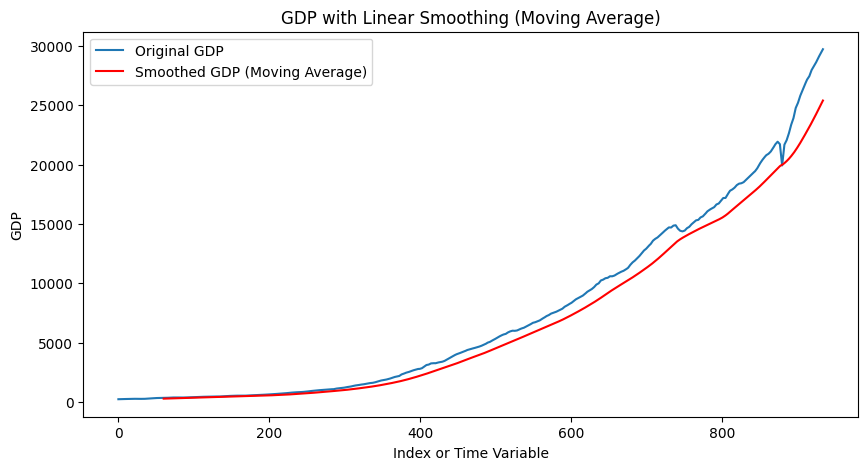

In [131]:


# Χτίζεται παράθυρο 61 διαδοχικών τιμών.
df['gdp_smooth'] = df['GDP'].rolling(window=61).mean()


# Plot της original με τη smooth χρονοσειρά
plt.figure(figsize=(10, 5))
plt.plot(df['GDP'], label='Original GDP')
plt.plot(df['gdp_smooth'], label='Smoothed GDP (Moving Average)', color='red')
plt.xlabel('Index or Time Variable')
plt.ylabel('GDP')
plt.title('GDP with Linear Smoothing (Moving Average)')
plt.legend()
plt.show()


In [137]:
#Τα πρώτα 60 στοιχεία γίνονται NaNs της Smooth χρονοσειράς
df.head(61)

,index,observation_date_GDP,GDP,observation_date_RGDP,RGDP,observation_date_CP,capital inflow,observation_date_PS,personal savings,gdp_smooth,rgdp_smooth
0,0,1947-01-01,243.164000,1947-01-01,2182.681000,1960-01-01,0.926000,1959-01-01,39.6,NaN,NaN
1,1,1947-02-01,244.098667,1947-02-01,2180.751333,1960-02-01,0.921333,1959-02-01,37.5,NaN,NaN
2,2,1947-03-01,245.033333,1947-03-01,2178.821667,1960-03-01,0.916667,1959-03-01,36.5,NaN,NaN
3,3,1947-04-01,245.968000,1947-04-01,2176.892000,1960-04-01,0.912000,1959-04-01,40.0,NaN,NaN
4,4,1947-05-01,247.173667,1947-05-01,2175.405333,1960-05-01,0.735000,1959-05-01,38.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56,56,1951-09-01,354.580333,1951-09-01,2697.190333,1964-09-01,1.443667,1963-09-01,48.7,NaN,NaN
57,57,1951-10-01,356.178000,1951-10-01,2699.156000,1964-10-01,1.781000,1963-10-01,51.5,NaN,NaN
58,58,1951-11-01,357.392000,1951-11-01,2708.755333,1964-11-01,1.256667,1963-11-01,49.5,NaN,NaN
59,59,1951-12-01,358.606000,1951-12-01,2718.354667,1964-12-01,0.732333,1963-12-01,48.5,NaN,NaN


## RGDP Smooth

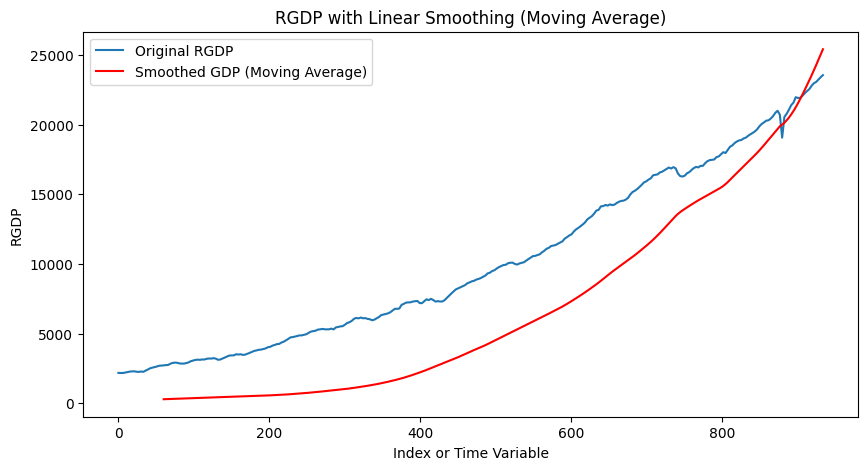

In [138]:


# Χτίζεται παράθυρο 61 διαδοχικών τιμών.
df['rgdp_smooth'] = df['RGDP'].rolling(window=61).mean()


# Plot της original με τη smooth χρονοσειρά
plt.figure(figsize=(10, 5))
plt.plot(df['RGDP'], label='Original RGDP')
plt.plot(df['gdp_smooth'], label='Smoothed GDP (Moving Average)', color='red')
plt.xlabel('Index or Time Variable')
plt.ylabel('RGDP')
plt.title('RGDP with Linear Smoothing (Moving Average)')
plt.legend()
plt.show()


## capital inflow smooth

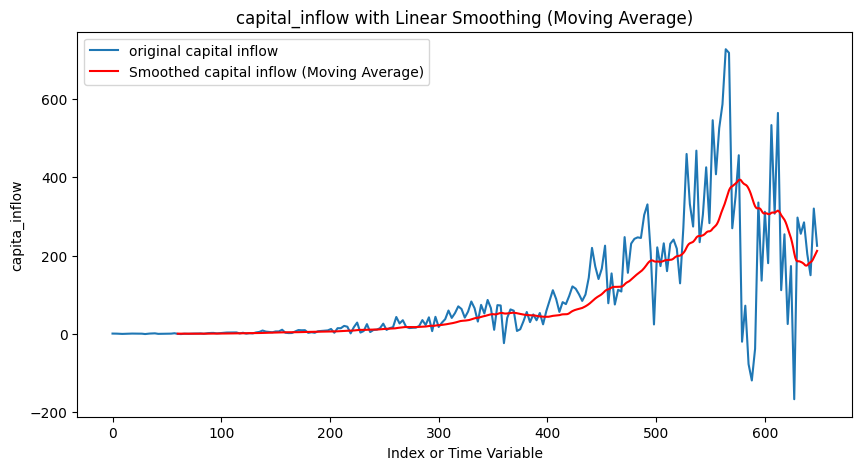

In [139]:


# Χτίζεται παράθυρο 61 διαδοχικών τιμών.
df['capital inflow_smooth'] = df['capital inflow'].rolling(window=61).mean()


# Plot της original με τη smooth χρονοσειρά
plt.figure(figsize=(10, 5))
plt.plot(df['capital inflow'], label='original capital inflow')
plt.plot(df['capital inflow_smooth'], label='Smoothed capital inflow (Moving Average)', color='red')
plt.xlabel('Index or Time Variable')
plt.ylabel('capita_inflow')
plt.title('capital_inflow with Linear Smoothing (Moving Average)')
plt.legend()
plt.show()


## personal savings smooth

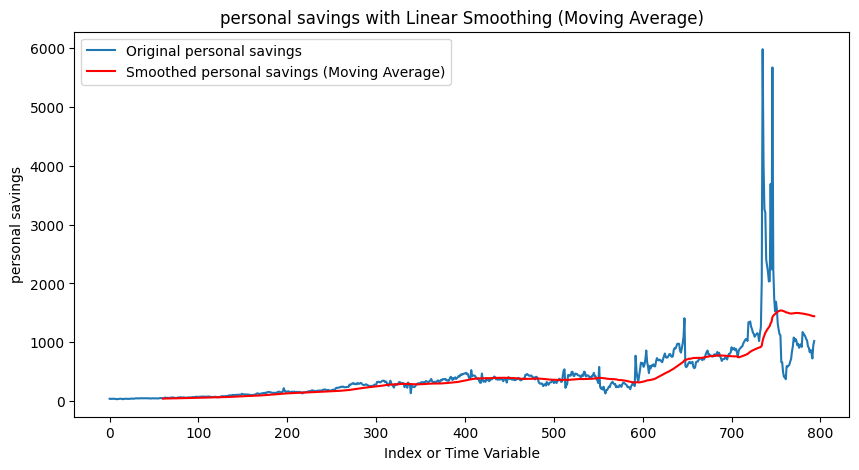

In [140]:


# Χτίζεται παράθυρο 61 διαδοχικών τιμών.
df['personal savings_smooth'] = df['personal savings'].rolling(window=61).mean()


# Plot της original με τη smooth χρονοσειρά
plt.figure(figsize=(10, 5))
plt.plot(df['personal savings'], label='Original personal savings')
plt.plot(df['personal savings_smooth'], label='Smoothed personal savings (Moving Average)', color='red')
plt.xlabel('Index or Time Variable')
plt.ylabel('personal savings')
plt.title('personal savings with Linear Smoothing (Moving Average)')
plt.legend()
plt.show()


## Το Dataframe με τις smooth χρονοσειρές

In [142]:
df

,index,observation_date_GDP,GDP,observation_date_RGDP,RGDP,observation_date_CP,capital inflow,observation_date_PS,personal savings,gdp_smooth,rgdp_smooth,capital inflow_smooth,personal savings_smooth
0,0,1947-01-01,243.164000,1947-01-01,2182.681000,1960-01-01,0.926000,1959-01-01,39.6,NaN,NaN,NaN,NaN
1,1,1947-02-01,244.098667,1947-02-01,2180.751333,1960-02-01,0.921333,1959-02-01,37.5,NaN,NaN,NaN,NaN
2,2,1947-03-01,245.033333,1947-03-01,2178.821667,1960-03-01,0.916667,1959-03-01,36.5,NaN,NaN,NaN,NaN
3,3,1947-04-01,245.968000,1947-04-01,2176.892000,1960-04-01,0.912000,1959-04-01,40.0,NaN,NaN,NaN,NaN
4,4,1947-05-01,247.173667,1947-05-01,2175.405333,1960-05-01,0.735000,1959-05-01,38.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,929,2024-06-01,29255.514000,2024-06-01,23341.498000,NaT,NaN,NaN,NaN,24890.107311,21725.546016,NaN,NaN
930,930,2024-07-01,29374.914000,2024-07-01,23400.294000,NaT,NaN,NaN,NaN,25017.388525,21768.780787,NaN,NaN
931,931,2024-08-01,29491.230667,2024-08-01,23447.645667,NaT,NaN,NaN,NaN,25144.832126,21811.474617,NaN,NaN
932,932,2024-09-01,29607.547333,2024-09-01,23494.997333,NaT,NaN,NaN,NaN,25273.001978,21854.168060,NaN,NaN


## Θα κάνουμε μια κανονικοποιημένη στήλη της original/smooth χρονοσειράς

### GDP

In [145]:
df['gdp_smooth'].head(61)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
56           NaN
57           NaN
58           NaN
59           NaN
60    291.738754
Name: gdp_smooth, Length: 61, dtype: float64

In [146]:

# Θα αντικαταστ΄ήσουμε τα NaNs με 291.738754 και μετά θα υπολογίσουμε την στήλη
df['GDP/GDPSMTHD'] = df['GDP'] / df['gdp_smooth'].fillna(291.738754)


    

###  RGDP

In [147]:
df['rgdp_smooth'].head(61)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
         ...     
56            NaN
57            NaN
58            NaN
59            NaN
60    2382.056885
Name: rgdp_smooth, Length: 61, dtype: float64

In [148]:
# Θα αντικαταστ΄ήσουμε τα NaNs με 2382.056885 και μετά θα υπολογίσουμε την στήλη
df['RGDP/GDPSMTHD'] = df['RGDP'] / df['rgdp_smooth'].fillna(2382.056885)

###  personal savings


In [150]:
df['personal savings_smooth'].head(61)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
56          NaN
57          NaN
58          NaN
59          NaN
60    42.747541
Name: personal savings_smooth, Length: 61, dtype: float64

In [151]:
# Θα αντικαταστ΄ήσουμε τα NaNs με 42.747541 και μετά θα υπολογίσουμε την στήλη
df['perssav/persavsmthd'] = df['personal savings'] / df['personal savings_smooth'].fillna(42.747541	)

###  capital inflow 


In [152]:
df['capital inflow_smooth'].head(61)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
56         NaN
57         NaN
58         NaN
59         NaN
60    0.669049
Name: capital inflow_smooth, Length: 61, dtype: float64

In [153]:
# Θα αντικαταστ΄ήσουμε τα NaNs με 42.747541 και μετά θα υπολογίσουμε την στήλη
df['capinfl/capinflsmthd'] = df['capital inflow'] / df['capital inflow_smooth'].fillna(0.669049)

In [154]:
df

,index,observation_date_GDP,GDP,observation_date_RGDP,RGDP,observation_date_CP,capital inflow,observation_date_PS,personal savings,gdp_smooth,rgdp_smooth,capital inflow_smooth,personal savings_smooth,GDP/GDPSMTHD,RGDP/GDPSMTHD,perssav/persavsmthd,capinfl/capinflsmthd
0,0,1947-01-01,243.164000,1947-01-01,2182.681000,1960-01-01,0.926000,1959-01-01,39.6,NaN,NaN,NaN,NaN,0.833499,0.916301,0.926369,1.384054
1,1,1947-02-01,244.098667,1947-02-01,2180.751333,1960-02-01,0.921333,1959-02-01,37.5,NaN,NaN,NaN,NaN,0.836703,0.915491,0.877243,1.377079
2,2,1947-03-01,245.033333,1947-03-01,2178.821667,1960-03-01,0.916667,1959-03-01,36.5,NaN,NaN,NaN,NaN,0.839907,0.914681,0.853850,1.370104
3,3,1947-04-01,245.968000,1947-04-01,2176.892000,1960-04-01,0.912000,1959-04-01,40.0,NaN,NaN,NaN,NaN,0.843110,0.913871,0.935726,1.363129
4,4,1947-05-01,247.173667,1947-05-01,2175.405333,1960-05-01,0.735000,1959-05-01,38.1,NaN,NaN,NaN,NaN,0.847243,0.913247,0.891279,1.098574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,929,2024-06-01,29255.514000,2024-06-01,23341.498000,NaT,NaN,NaN,NaN,24890.107311,21725.546016,NaN,NaN,1.175387,1.074380,NaN,NaN
930,930,2024-07-01,29374.914000,2024-07-01,23400.294000,NaT,NaN,NaN,NaN,25017.388525,21768.780787,NaN,NaN,1.174180,1.074947,NaN,NaN
931,931,2024-08-01,29491.230667,2024-08-01,23447.645667,NaT,NaN,NaN,NaN,25144.832126,21811.474617,NaN,NaN,1.172855,1.075014,NaN,NaN
932,932,2024-09-01,29607.547333,2024-09-01,23494.997333,NaT,NaN,NaN,NaN,25273.001978,21854.168060,NaN,NaN,1.171509,1.075081,NaN,NaN


## Φέρνουμε το Dataframe σε μια πιο ευκολοδιάβαστη μορφή

In [156]:
# Βάζουμε τις στήλες στην σειρά που θέλουμε
desired_order = [
    'observation_date_GDP', 'GDP', 'gdp_smooth','GDP/GDPSMTHD',	
    'observation_date_RGDP', 'RGDP', 'rgdp_smooth','RGDP/GDPSMTHD',
    'observation_date_CP','capital inflow','capital inflow_smooth','capinfl/capinflsmthd',
    'observation_date_PS','personal savings','personal savings_smooth','perssav/persavsmthd']
    
    


df_reordered = df[desired_order]

In [157]:
df_reordered.head(61)

,observation_date_GDP,GDP,gdp_smooth,GDP/GDPSMTHD,observation_date_RGDP,RGDP,rgdp_smooth,RGDP/GDPSMTHD,observation_date_CP,capital inflow,capital inflow_smooth,capinfl/capinflsmthd,observation_date_PS,personal savings,personal savings_smooth,perssav/persavsmthd
0,1947-01-01,243.164000,NaN,0.833499,1947-01-01,2182.681000,NaN,0.916301,1960-01-01,0.926000,NaN,1.384054,1959-01-01,39.6,NaN,0.926369
1,1947-02-01,244.098667,NaN,0.836703,1947-02-01,2180.751333,NaN,0.915491,1960-02-01,0.921333,NaN,1.377079,1959-02-01,37.5,NaN,0.877243
2,1947-03-01,245.033333,NaN,0.839907,1947-03-01,2178.821667,NaN,0.914681,1960-03-01,0.916667,NaN,1.370104,1959-03-01,36.5,NaN,0.853850
3,1947-04-01,245.968000,NaN,0.843110,1947-04-01,2176.892000,NaN,0.913871,1960-04-01,0.912000,NaN,1.363129,1959-04-01,40.0,NaN,0.935726
4,1947-05-01,247.173667,NaN,0.847243,1947-05-01,2175.405333,NaN,0.913247,1960-05-01,0.735000,NaN,1.098574,1959-05-01,38.1,NaN,0.891279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1951-09-01,354.580333,NaN,1.215404,1951-09-01,2697.190333,NaN,1.132295,1964-09-01,1.443667,NaN,2.157789,1963-09-01,48.7,NaN,1.139247
57,1951-10-01,356.178000,NaN,1.220880,1951-10-01,2699.156000,NaN,1.133120,1964-10-01,1.781000,NaN,2.661987,1963-10-01,51.5,NaN,1.204748
58,1951-11-01,357.392000,NaN,1.225041,1951-11-01,2708.755333,NaN,1.137150,1964-11-01,1.256667,NaN,1.878288,1963-11-01,49.5,NaN,1.157961
59,1951-12-01,358.606000,NaN,1.229202,1951-12-01,2718.354667,NaN,1.141180,1964-12-01,0.732333,NaN,1.094588,1963-12-01,48.5,NaN,1.134568


In [159]:
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_smoothed_and_ordered.csv'
df_reordered.to_csv(file_path, index=False)

##### GDP max min

In [164]:
df_reordered.head(10)

,observation_date_GDP,GDP,gdp_smooth,GDP/GDPSMTHD,observation_date_RGDP,RGDP,rgdp_smooth,RGDP/GDPSMTHD,observation_date_CP,capital inflow,capital inflow_smooth,capinfl/capinflsmthd,observation_date_PS,personal savings,personal savings_smooth,perssav/persavsmthd
0,1947-01-01,243.164000,NaN,0.833499,1947-01-01,2182.681000,NaN,0.916301,1960-01-01,0.926000,NaN,1.384054,1959-01-01,39.6,NaN,0.926369
1,1947-02-01,244.098667,NaN,0.836703,1947-02-01,2180.751333,NaN,0.915491,1960-02-01,0.921333,NaN,1.377079,1959-02-01,37.5,NaN,0.877243
2,1947-03-01,245.033333,NaN,0.839907,1947-03-01,2178.821667,NaN,0.914681,1960-03-01,0.916667,NaN,1.370104,1959-03-01,36.5,NaN,0.853850
3,1947-04-01,245.968000,NaN,0.843110,1947-04-01,2176.892000,NaN,0.913871,1960-04-01,0.912000,NaN,1.363129,1959-04-01,40.0,NaN,0.935726
4,1947-05-01,247.173667,NaN,0.847243,1947-05-01,2175.405333,NaN,0.913247,1960-05-01,0.735000,NaN,1.098574,1959-05-01,38.1,NaN,0.891279
5,1947-06-01,248.379333,NaN,0.851376,1947-06-01,2173.918667,NaN,0.912622,1960-06-01,0.558000,NaN,0.834020,1959-06-01,38.2,NaN,0.893619
6,1947-07-01,249.585000,NaN,0.855509,1947-07-01,2172.432000,NaN,0.911998,1960-07-01,0.381000,NaN,0.569465,1959-07-01,38.7,NaN,0.905315
7,1947-08-01,252.971667,NaN,0.867117,1947-08-01,2183.772000,NaN,0.916759,1960-08-01,0.279667,NaN,0.418006,1959-08-01,34.7,NaN,0.811743
8,1947-09-01,256.358333,NaN,0.878726,1947-09-01,2195.112000,NaN,0.921520,1960-09-01,0.178333,NaN,0.266547,1959-09-01,31.6,NaN,0.739224
9,1947-10-01,259.745000,NaN,0.890334,1947-10-01,2206.452000,NaN,0.926280,1960-10-01,0.077000,NaN,0.115089,1959-10-01,34.1,NaN,0.797707


In [165]:
df_sampled = df.iloc[::3]


In [166]:
df_sampled = df_reordered.iloc[::3]

In [167]:

x =df['Date']
y =df['GDP/GDPSMTHD']
y2=df['capinfl/capinflsmthd']

# Find local maxima using SciPy's find_peaks function
max_indices, _ = find_peaks(y, prominence=0.001)  # 'prominence' can help reduce false peaks
max_values = y[max_indices]

# To find local minima, invert the signal and then search for peaks
min_indices, _ = find_peaks(-y, prominence=0.001)
min_values = y[min_indices]  # Note: these are the original (non-inverted) y values

# Print the indices and corresponding values for local extrema
print("Local Maximum Indices:", max_indices)
print("Local Maximum Values:", max_values)
print("Local Minimum Indices:", min_indices)
print("Local Minimum Values:", min_values)




KeyError: 'Date'

In [162]:
# Plot the original data and mark the extrema
plt.figure(figsize=(10, 6))
plt.plot(x, 3*y, label='Data', color='blue')
plt.plot(x, y2, label='Data', color='black')
#plt.plot(x[max_indices], max_values, 'ro', label='Local Maxima')  # red circles for maxima
#plt.plot(x[min_indices], min_values, 'go', label='Local Minima')  # green circles for minima
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('Local Maxima and Minima Detection')
plt.legend()
plt.show()


NameError: name 'x' is not defined

<Figure size 1000x600 with 0 Axes>

In [39]:
df_new_max=df.iloc[max_indices]

In [40]:
df_new_max[['GDP/GDPSMTHD','perssav/persavsmthd','capinfl/capinflsmthd']].dropna()

,GDP/GDPSMTHD,perssav/persavsmthd,capinfl/capinflsmthd
21,0.961017,0.874904,1.068681
30,0.935388,1.111175,-0.414020
60,1.233364,1.141586,0.310889
69,1.230967,1.195992,0.467395
102,1.147575,1.321516,2.681602
120,1.153504,1.063177,1.692550
126,1.146233,1.252731,0.998380
147,1.151720,1.355499,1.282219
156,1.145648,1.241906,2.650340
180,1.143183,1.413534,0.510903


In [41]:
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_minimum_GDP.csv'
df_new_max.to_csv(file_path, index=False)

In [43]:
df_new_min=df.iloc[min_indices]

In [44]:
df_new_min[['GDP/GDPSMTHD','perssav/persavsmthd','capinfl/capinflsmthd']].dropna()

,GDP/GDPSMTHD,perssav/persavsmthd,capinfl/capinflsmthd
27,0.930116,0.954441,1.008895
33,0.927635,1.094800,1.164339
66,1.212383,1.213369,0.988188
90,1.120089,1.152314,3.230009
114,1.137206,1.105643,2.284155
123,1.143682,1.004829,0.454828
132,1.093105,1.254241,1.789268
153,1.131710,1.338643,1.738351
168,1.098167,1.258365,1.501656
183,1.141609,1.266897,0.803685


In [45]:
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_minimum_GDP.csv'
df_new_min.to_csv(file_path, index=False)

In [46]:
df

,index,Date,GDP,Date.1,RGDP,Date.2,capital inflow,Date.3,personal savings,gdp_smooth,rgdp_smooth,capital inflow_smooth,personal savings_smooth,GDP/GDPSMTHD,RGDP/GDPSMTHD,perssav/persavsmthd,capinfl/capinflsmthd
0,0,1/1/1947,243.164000,1/1/1947,2182.681000,1/1/1960,0.926000,1/1/1959,39.6,NaN,NaN,NaN,NaN,0.833499,0.916301,0.926369,1.384054
1,1,2/1/1947,244.098667,2/1/1947,2180.751333,2/1/1960,0.921333,2/1/1959,37.5,NaN,NaN,NaN,NaN,0.836703,0.915491,0.877243,1.377079
2,2,3/1/1947,245.033333,3/1/1947,2178.821667,3/1/1960,0.916667,3/1/1959,36.5,NaN,NaN,NaN,NaN,0.839907,0.914681,0.853850,1.370104
3,3,4/1/1947,245.968000,4/1/1947,2176.892000,4/1/1960,0.912000,4/1/1959,40.0,NaN,NaN,NaN,NaN,0.843110,0.913871,0.935726,1.363129
4,4,5/1/1947,247.173667,5/1/1947,2175.405333,5/1/1960,0.735000,5/1/1959,38.1,NaN,NaN,NaN,NaN,0.847243,0.913247,0.891279,1.098574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,929,6/1/2024,29255.514000,6/1/2024,23341.498000,NaN,NaN,NaN,NaN,24890.107311,21725.546016,NaN,NaN,1.175387,1.074380,NaN,NaN
930,930,7/1/2024,29374.914000,7/1/2024,23400.294000,NaN,NaN,NaN,NaN,25017.388525,21768.780787,NaN,NaN,1.174180,1.074947,NaN,NaN
931,931,8/1/2024,29491.230667,8/1/2024,23447.645667,NaN,NaN,NaN,NaN,25144.832126,21811.474617,NaN,NaN,1.172855,1.075014,NaN,NaN
932,932,9/1/2024,29607.547333,9/1/2024,23494.997333,NaN,NaN,NaN,NaN,25273.001978,21854.168060,NaN,NaN,1.171509,1.075081,NaN,NaN


### max min capital

In [48]:
df['Date.2'] = pd.to_datetime(df['Date.2'].astype(str), errors='coerce')
x =df['Date.2']
y =df['capinfl/capinflsmthd']


# Find local maxima using SciPy's find_peaks function
max_indices, _ = find_peaks(y, prominence=0.001)  # 'prominence' can help reduce false peaks
max_values = y[max_indices]

# To find local minima, invert the signal and then search for peaks
min_indices, _ = find_peaks(-y, prominence=0.001)  #μετράει πόσο «ξεχωρίζει» μια κορυφή από το γύρω της τοπίο
min_values = y[min_indices]  # Note: these are the original (non-inverted) y values

# Print the indices and corresponding values for local extrema
print("Local Maximum Indices:", max_indices)
print("Local Maximum Values:", max_values)
print("Local Minimum Indices:", min_indices)
print("Local Minimum Values:", min_values)




Local Maximum Indices: [ 18  24  39  57  66  75  81  90 105 120 126 138 150 156 171 183 201 207
 213 225 234 249 261 267 278 285 291 297 309 318 330 339 345 354 366 381
 387 393 405 414 423 441 453 459 465 471 477 492 501 507 516 528 537 546
 552 564 576 582 594 600 606 612 618 624 630 636 645]
Local Maximum Values: 18     1.396011
24     1.101564
39     2.282344
57     2.661987
66     0.988188
         ...   
618    0.872907
624    0.708567
630    1.602461
636    1.595110
645    1.642163
Name: capinfl/capinflsmthd, Length: 67, dtype: float64
Local Minimum Indices: [  9  21  30  42  63  69  78  84  96 117 123 129 147 153 162 180 186 204
 210 219 228 237 252 264 273 279 288 294 300 312 324 336 342 351 360 372
 384 390 396 411 417 432 447 456 462 468 474 486 498 504 510 522 534 540
 549 555 570 579 588 597 603 609 615 621 627 633 642]
Local Minimum Values: 9      0.115089
21     1.068681
30    -0.414020
42     0.306405
63    -0.535429
         ...   
615    0.368465
621    0.093838
627  

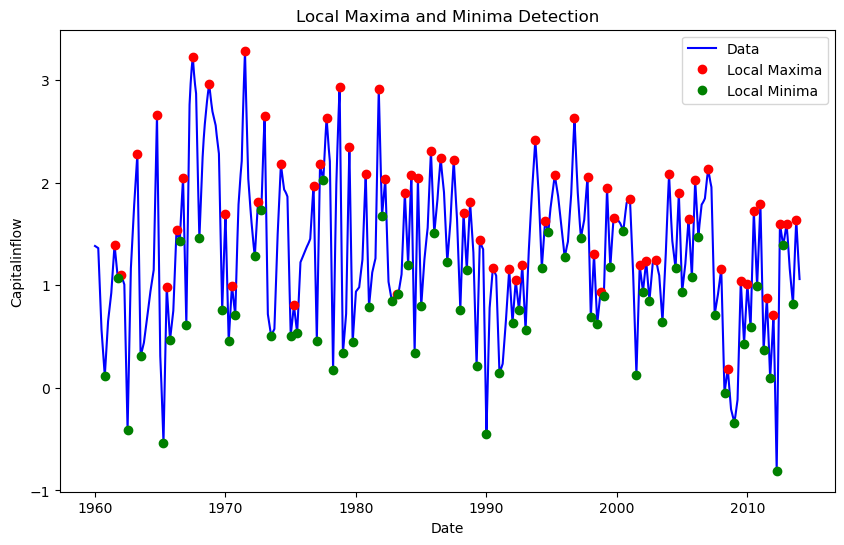

In [49]:
# Plot the original data and mark the extrema
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data', color='blue')
plt.plot(x[max_indices], max_values, 'ro', label='Local Maxima')  # red circles for maxima
plt.plot(x[min_indices], min_values, 'go', label='Local Minima')  # green circles for minima
plt.xlabel('Date')
plt.ylabel('Capitalinflow')
plt.title('Local Maxima and Minima Detection')
plt.legend()
plt.show()


### min cap inf

In [51]:
df_new_min_cap=df.iloc[min_indices]

In [52]:
df_new_min_cap[['capinfl/capinflsmthd','GDP/GDPSMTHD','perssav/persavsmthd']].dropna()

,capinfl/capinflsmthd,GDP/GDPSMTHD,perssav/persavsmthd
9,0.115089,0.890334,0.797707
21,1.068681,0.961017,0.874904
30,-0.414020,0.935388,1.111175
42,0.306405,1.056264,1.129890
63,-0.535429,1.213670,1.345352
...,...,...,...
615,0.368465,1.142813,1.726398
621,0.093838,1.151323,1.535540
627,-0.807742,1.147556,1.523907
633,1.389258,1.159530,1.404674


In [53]:
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_min_capinfmin.csv'
df_new_min.to_csv(file_path, index=False)

### max cap inf

In [55]:
df_new_max_cap=df.iloc[max_indices]

In [56]:
df_new_max_cap[['capinfl/capinflsmthd','GDP/GDPSMTHD','perssav/persavsmthd']].dropna()

,capinfl/capinflsmthd,GDP/GDPSMTHD,perssav/persavsmthd
18,1.396011,0.957007,0.919351
24,1.101564,0.942741,0.989531
39,2.282344,0.995353,1.136908
57,2.661987,1.220880,1.204748
66,0.988188,1.212383,1.213369
...,...,...,...
618,0.872907,1.146036,1.671538
624,0.708567,1.149620,1.660411
630,1.602461,1.150803,1.568013
636,1.595110,1.154909,1.599950


In [57]:
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_max_capinfmax.csv'
df_new_min.to_csv(file_path, index=False)

### personal saving max min

In [59]:
df['Date.3'] = pd.to_datetime(df['Date.2'].astype(str), errors='coerce')
x =df['Date.3']
y =df['perssav/persavsmthd']


# Find local maxima using SciPy's find_peaks function
max_indices, _ = find_peaks(y, prominence=0.001)  # 'prominence' can help reduce false peaks
max_values = y[max_indices]

# To find local minima, invert the signal and then search for peaks
min_indices, _ = find_peaks(-y, prominence=0.001)
min_values = y[min_indices]  # Note: these are the original (non-inverted) y values

# Print the indices and corresponding values for local extrema
print("Local Maximum Indices:", max_indices)
print("Local Maximum Values:", max_values)
print("Local Minimum Indices:", min_indices)
print("Local Minimum Values:", min_values)


Local Maximum Indices: [  3   6  11  17  25  30  34  37  39  42  45  48  52  57  60  63  68  71
  77  80  83  89  91  94  98 100 103 105 109 111 117 119 122 126 128 131
 135 138 142 144 146 149 157 160 167 171 173 175 177 179 186 191 196 201
 205 208 211 214 216 219 221 224 228 234 237 240 242 246 251 256 260 262
 268 270 274 276 279 282 288 294 298 301 307 311 316 321 326 329 334 336
 338 340 347 349 351 354 356 362 366 370 373 375 378 380 384 387 389 393
 395 397 399 401 403 407 409 415 419 422 424 426 429 433 436 438 441 445
 449 452 454 460 470 474 478 480 486 490 492 499 501 506 512 516 518 521
 524 526 532 534 538 541 543 545 551 554 556 562 566 569 571 574 578 584
 589 592 598 600 604 608 610 612 616 625 630 636 639 647 653 656 665 668
 673 681 684 686 694 700 703 705 716 719 721 729 735 744 746 750 760 762
 770 772 775 778 780 789]
Local Maximum Values: 3      0.935726
6      0.905315
11     0.952102
17     0.919351
25     0.998888
         ...   
772    0.704922
775    0.64955

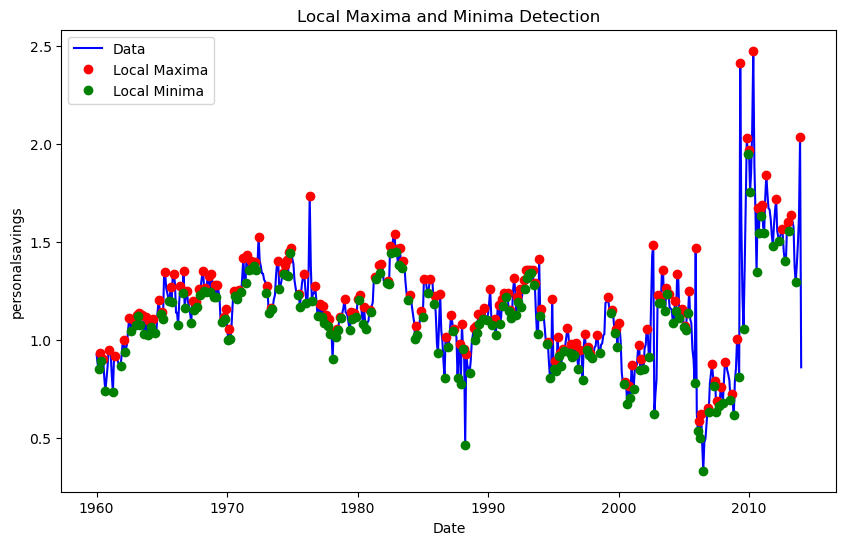

In [60]:
# Plot the original data and mark the extrema
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data', color='blue')
plt.plot(x[max_indices], max_values, 'ro', label='Local Maxima')  # red circles for maxima
plt.plot(x[min_indices], min_values, 'go', label='Local Minima')  # green circles for minima
plt.xlabel('Date')
plt.ylabel('personalsavings')
plt.title('Local Maxima and Minima Detection')
plt.legend()
plt.show()


In [61]:
df_new_max_sav=df.iloc[max_indices]

In [62]:
df_new_max_sav[['perssav/persavsmthd','capinfl/capinflsmthd','GDP/GDPSMTHD']].dropna()

,perssav/persavsmthd,capinfl/capinflsmthd,GDP/GDPSMTHD
3,0.935726,1.363129,0.843110
6,0.905315,0.569465,0.855509
11,0.952102,0.471814,0.904038
17,0.919351,1.239570,0.949433
25,0.998888,1.070674,0.938533
...,...,...,...
625,1.717102,0.256686,1.148913
630,1.568013,1.602461,1.150803
636,1.599950,1.595110,1.154909
639,1.638843,1.163078,1.165888


In [63]:
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_max_savmax.csv'
df_new_min.to_csv(file_path, index=False)

### min sav

In [65]:
df_new_min_sav=df.iloc[min_indices]

In [66]:
df_new_min_sav[['capinfl/capinflsmthd','GDP/GDPSMTHD','perssav/persavsmthd']].dropna()

,capinfl/capinflsmthd,GDP/GDPSMTHD,perssav/persavsmthd
2,1.370104,0.839907,0.853850
4,1.098574,0.847243,0.891279
8,0.266547,0.878726,0.739224
15,0.926688,0.934285,0.734545
22,1.079642,0.954925,0.867886
...,...,...,...
622,0.285696,1.150762,1.481528
628,-0.062167,1.148706,1.505982
633,1.389258,1.159530,1.404674
637,1.470756,1.158741,1.554727


In [67]:
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_min_savmin.csv'
df_new_min.to_csv(file_path, index=False)